# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

## Perform API Calls

In [3]:
import time
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        time.sleep(2)
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gaoua
Processing Record 2 of Set 1 | bastrop
Processing Record 3 of Set 1 | roma
Processing Record 4 of Set 1 | nata
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kruisfontein
Processing Record 9 of Set 1 | tezu
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | sakaiminato
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | hami
Processing Record 18 of Set 1 | takoradi
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | buraydah
Processing Record 23 of Set 1 | albany
Processing Record 

Processing Record 34 of Set 4 | katsuura
Processing Record 35 of Set 4 | sao gabriel da cachoeira
Processing Record 36 of Set 4 | saint-louis
Processing Record 37 of Set 4 | maniitsoq
Processing Record 38 of Set 4 | raytown
Processing Record 39 of Set 4 | grindavik
Processing Record 40 of Set 4 | halalo
City not found. Skipping...
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | thinadhoo
Processing Record 43 of Set 4 | beavercreek
Processing Record 44 of Set 4 | santa maria
Processing Record 45 of Set 4 | jamestown
Processing Record 46 of Set 4 | ribeira grande
Processing Record 47 of Set 4 | luoyang
Processing Record 48 of Set 4 | henties bay
Processing Record 49 of Set 4 | cam ranh
Processing Record 0 of Set 5 | lasa
Processing Record 1 of Set 5 | wodonga
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | kununurra
Processing Record 4 of Set 5 | toktogul
Processing Record 5 of Set 5 | talcahuano
Processing Record 6 of Set 5 | sokolo
Processi

Processing Record 20 of Set 8 | ketchikan
Processing Record 21 of Set 8 | buchanan
Processing Record 22 of Set 8 | luderitz
Processing Record 23 of Set 8 | praxedis guerrero
Processing Record 24 of Set 8 | makat
Processing Record 25 of Set 8 | nizhniy odes
Processing Record 26 of Set 8 | dharan
Processing Record 27 of Set 8 | lumban
Processing Record 28 of Set 8 | longido
Processing Record 29 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 30 of Set 8 | kungurtug
Processing Record 31 of Set 8 | nantucket
Processing Record 32 of Set 8 | kerema
Processing Record 33 of Set 8 | morehead
Processing Record 34 of Set 8 | boshnyakovo
Processing Record 35 of Set 8 | himora
City not found. Skipping...
Processing Record 36 of Set 8 | shache
Processing Record 37 of Set 8 | victoria
Processing Record 38 of Set 8 | tazovskiy
Processing Record 39 of Set 8 | dryden
Processing Record 40 of Set 8 | muroto
Processing Record 41 of Set 8 | kaitangata
Processing Record 42 of Set 8 | tha

Processing Record 3 of Set 12 | orangeburg
Processing Record 4 of Set 12 | maloshuyka
City not found. Skipping...
Processing Record 5 of Set 12 | vicuna
Processing Record 6 of Set 12 | taft
Processing Record 7 of Set 12 | nikki
Processing Record 8 of Set 12 | humen
Processing Record 9 of Set 12 | dudinka
Processing Record 10 of Set 12 | bradu
Processing Record 11 of Set 12 | along
Processing Record 12 of Set 12 | mogadishu
Processing Record 13 of Set 12 | opuwo
Processing Record 14 of Set 12 | altay
Processing Record 15 of Set 12 | lingao
Processing Record 16 of Set 12 | tignere
Processing Record 17 of Set 12 | ciudad bolivar
Processing Record 18 of Set 12 | dali
Processing Record 19 of Set 12 | hienghene
Processing Record 20 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 21 of Set 12 | pudozh
Processing Record 22 of Set 12 | xining
Processing Record 23 of Set 12 | tarauaca
Processing Record 24 of Set 12 | getahovit
Processing Record 25 of Set 12 | souillac
Proces

In [4]:
city_data

[{'City': 'gaoua',
  'Lat': 10.3,
  'Lng': -3.25,
  'Max Temp': 90.75,
  'Humidity': 6,
  'Cloudiness': 100,
  'Wind Speed': 7.4,
  'Country': 'BF',
  'Date': 1581532056},
 {'City': 'bastrop',
  'Lat': 32.76,
  'Lng': -91.87,
  'Max Temp': 64,
  'Humidity': 93,
  'Cloudiness': 90,
  'Wind Speed': 5.82,
  'Country': 'US',
  'Date': 1581531952},
 {'City': 'roma',
  'Lat': 43.21,
  'Lng': -75.46,
  'Max Temp': 37.99,
  'Humidity': 59,
  'Cloudiness': 1,
  'Wind Speed': 5.82,
  'Country': 'US',
  'Date': 1581531894},
 {'City': 'nata',
  'Lat': 8.33,
  'Lng': -80.52,
  'Max Temp': 93.2,
  'Humidity': 44,
  'Cloudiness': 27,
  'Wind Speed': 17.22,
  'Country': 'PA',
  'Date': 1581532063},
 {'City': 'cape town',
  'Lat': -33.93,
  'Lng': 18.42,
  'Max Temp': 72,
  'Humidity': 93,
  'Cloudiness': 75,
  'Wind Speed': 16.11,
  'Country': 'ZA',
  'Date': 1581532065},
 {'City': 'rikitea',
  'Lat': -23.12,
  'Lng': -134.97,
  'Max Temp': 78.3,
  'Humidity': 80,
  'Cloudiness': 36,
  'Wind Speed': 2

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          521
Lat           521
Lng           521
Max Temp      521
Humidity      521
Cloudiness    521
Wind Speed    521
Country       521
Date          521
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gaoua,10.30,-3.25,90.75,6,100,7.40,BF,1581532056
1,bastrop,32.76,-91.87,64.00,93,90,5.82,US,1581531952
2,roma,43.21,-75.46,37.99,59,1,5.82,US,1581531894
3,nata,8.33,-80.52,93.20,44,27,17.22,PA,1581532063
4,cape town,-33.93,18.42,72.00,93,75,16.11,ZA,1581532065


## Latitude vs. Temperature Plot

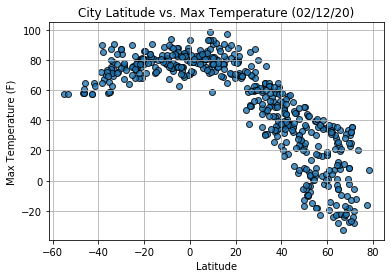

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

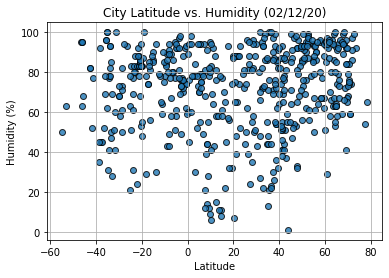

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

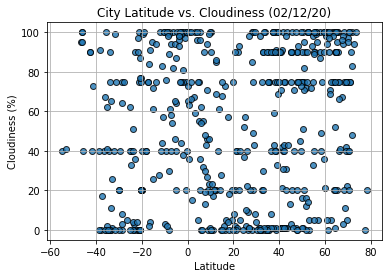

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

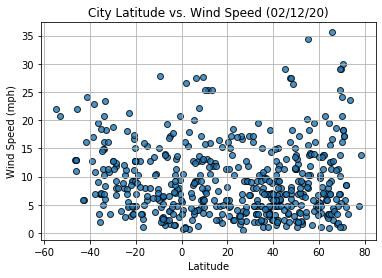

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [11]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8653945771481304


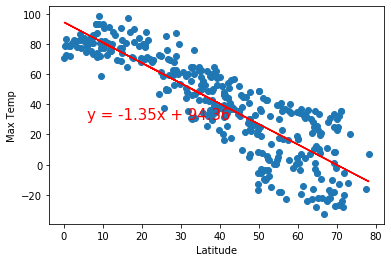

In [13]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.5439455517776177


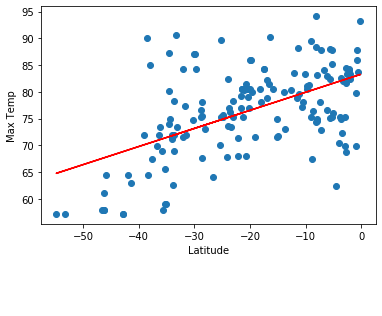

In [14]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.26960815688039297


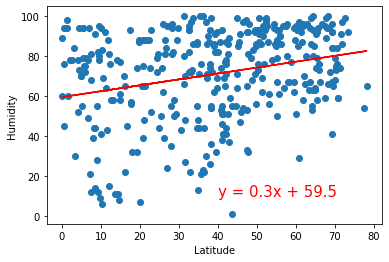

In [15]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.15878692458546584


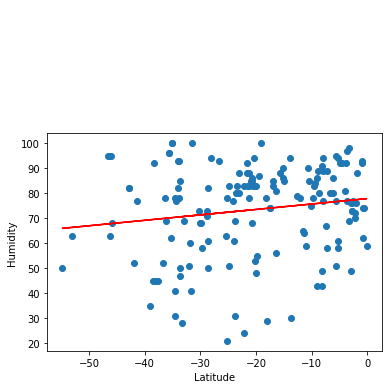

In [16]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.235340067865654


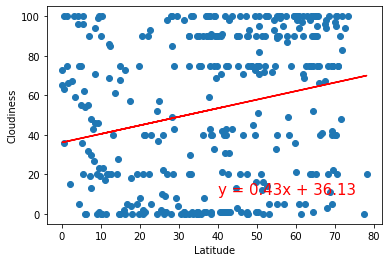

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.3203694415407735


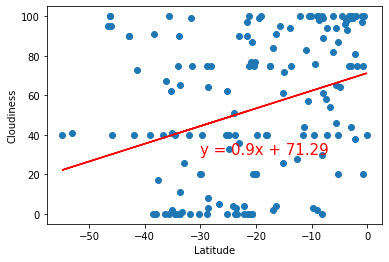

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.059796044905939885


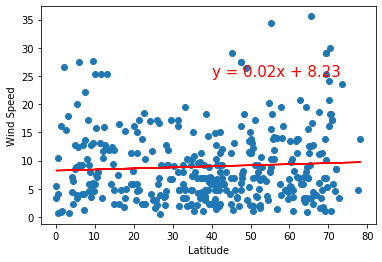

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.34072323788499465


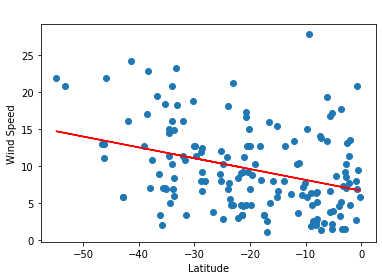

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.